## Using Sklearn

In [1]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

The X values are a 64 digit string: [ 0.  0.  4. 10. 16. 16.  7.  0.  0.  3. 16. 13. 11. 16.  2.  0.  0.  1.
  3.  0. 10.  9.  0.  0.  0.  0.  5.  8. 14. 15. 13.  0.  0.  0. 15. 16.
 14. 12.  8.  0.  0.  0.  3. 12.  7.  0.  0.  0.  0.  0.  0. 15.  4.  0.
  0.  0.  0.  0.  3. 14.  1.  0.  0.  0.]
and the y is the value of the number 7


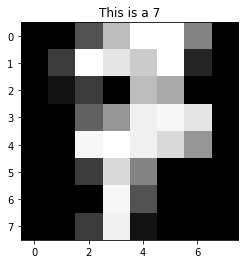

In [2]:
digits = datasets.load_digits()

X = digits['data']   # data with each 8x8 image "flattened" into a length-64 vector.
Y = digits['target'] # data labels (0-9). 

# what's the 653rd data look like?
n = 653

plt.imshow(digits['images'][n], cmap='Greys_r')
plt.title('This is a %d' % digits['target'][n])

print("The X values are a 64 digit string:", X[n])
print("and the y is the value of the number", Y[n])

In [17]:
# split for training and testing, 80%-20% for training-testing
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

## Questions

1. How big is the full data set? How many numbers in training set?  How many are held back in the test set?  You should have 30% in your test set.
2. What is the L1 distance between `X[15]` and `X[25]`?  (Manhattan)
3. What is the L2 distance between `X[15]` and `X[25]`?  (Euclidean)
4. What is the L3 distance between `X[15]` and `X[25]`?




In [18]:
# how many data in total, training and testing?
print('total number of rows:', np.shape(X)[0])
print('total number of cols:', np.shape(X)[1])
print('total number of training data:', np.shape(X_train)[0])

total number of rows: 1797
total number of cols: 64
total number of training data: 1437


In [24]:
from scipy.spatial import distance
# What is the L1 distance between X[15] and X[25]?
print('L1 Manhattan distance between X[15] and X[25] is:', distance.cityblock(X[15], X[25]))

# What is the L2 distance between X[15] and X[25]?
print('L2 Euclidean distance between X[15] and X[25] is:', distance.euclidean(X[15], X[25]))

# What is the L3 distance between X[15] and X[25]?
print('L3 Minkowski distance between X[15] and X[25] is:', distance.minkowski(X[15], X[25], 3))

L1 Manhattan distance between X[15] and X[25] is: 155.0
L2 Euclidean distance between X[15] and X[25] is: 33.926390907374746
L3 Minkowski distance between X[15] and X[25] is: 21.83415234319978


In [30]:
# what model we are using?
# p - using Euclidean distance
cupcake = neighbors.KNeighborsClassifier(n_neighbors=15, p=2)

# train the model!
cupcake.fit(X_train,Y_train)

# use it to predict!
Y_pred_train = cupcake.predict(X_train) 
Y_pred = cupcake.predict(X_test)

# how's the errors?
error_train = list(Y_train == Y_pred_train).count(False)/len(Y_train)
error_test = list(Y_test == Y_pred).count(False)/len(Y_test)

print("The training error was: ", error_train)
print("The testing error was: ", error_test)

The training error was:  0.016005567153792623
The testing error was:  0.022222222222222223


In [35]:
# what's the best number of neighbours?
n_list = [i for i in range(3, 20)]

def produce_error_vector(n, p=2, X_train=X_train, Y_train=Y_train, X_test=X_test, Y_test=Y_test):
    model = neighbors.KNeighborsClassifier(n_neighbors=n, p=2)

    # train the model!
    model.fit(X_train,Y_train)

    # use it to predict!
    Y_pred_train = model.predict(X_train) 
    Y_pred = model.predict(X_test)

    # how's the errors?
    error_train = list(Y_train == Y_pred_train).count(False)/len(Y_train)
    error_test = list(Y_test == Y_pred).count(False)/len(Y_test)
    
    return (error_train, error_test)

train_errors = []
test_errors = []

for n in n_list:
    train_errors.append(produce_error_vector(n)[0])
    test_errors.append(produce_error_vector(n)[1])

In [39]:
print('the choice of n that results in the min train error is:' ,train_errors.index(min(train_errors)))
print('the choice of n that results in the min test error is:' ,test_errors.index(min(test_errors)))
print('the choice of n that results in the max train error is:' ,train_errors.index(max(train_errors)))
print('the choice of n that results in the max test error is:' ,test_errors.index(max(test_errors)))

the choice of n that results in the min train error is: 0
the choice of n that results in the min test error is: 0
the choice of n that results in the max train error is: 15
the choice of n that results in the max test error is: 8
